In [1]:
# usual imports 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# scikit-learn and category encoders
from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
X = pd.read_csv("./archive(1)/X.csv")

In [3]:
y = pd.read_csv("./archive(1)/y.csv")

In [4]:
X.head()

,Unnamed: 0,loan_amnt,life_new,interest_rate_new,installment,grade_of_loans,annual_inc
0,0,5000,36,10.65,162.87,6,24000.0
1,1,2500,60,15.27,59.83,5,30000.0
2,2,2400,36,15.96,84.33,5,12252.0
3,3,10000,36,13.49,339.31,5,49200.0
4,4,3000,60,12.69,67.79,6,80000.0


In [5]:
X.drop("Unnamed: 0", axis =1, inplace=True)

In [6]:
X.head()

,loan_amnt,life_new,interest_rate_new,installment,grade_of_loans,annual_inc
0,5000,36,10.65,162.87,6,24000.0
1,2500,60,15.27,59.83,5,30000.0
2,2400,36,15.96,84.33,5,12252.0
3,10000,36,13.49,339.31,5,49200.0
4,3000,60,12.69,67.79,6,80000.0


In [7]:
y.head()

,Unnamed: 0,status_of_loans
0,0,0
1,1,2
2,2,0
3,3,0
4,4,1


In [8]:
y.drop("Unnamed: 0", axis =1, inplace=True)

In [9]:
y.head()

,status_of_loans
0,0
1,2
2,0
3,0
4,1


In [73]:
type(X)

pandas.core.frame.DataFrame

## TRAIN TEST SPLIT 

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=1234)

In [42]:
X_train.shape

(29787, 6)

In [43]:
X_train

,loan_amnt,life_new,interest_rate_new,installment,grade_of_loans,annual_inc
8394,4800,36,11.99,159.41,6,29534.0
38458,4900,36,14.12,167.76,4,32400.0
39680,3000,36,11.86,99.44,4,36153.0
12948,7550,36,9.99,243.59,6,31200.0
17908,6000,36,6.92,185.05,7,135000.0
...,...,...,...,...,...,...
34055,9475,36,8.94,301.04,7,27000.0
19125,6000,36,10.37,194.65,6,30000.0
28142,7200,36,11.12,236.13,6,65000.0
17706,6500,60,10.74,140.49,6,30000.0


In [77]:
y_train['status_of_loans'].value_counts(normalize=True)


0    0.829624
2    0.141673
1    0.028704
Name: status_of_loans, dtype: float64

In [78]:
y_test['status_of_loans'].value_counts(normalize=True)

0    0.829607
2    0.141692
1    0.028701
Name: status_of_loans, dtype: float64

In [45]:
X_test

,loan_amnt,life_new,interest_rate_new,installment,grade_of_loans,annual_inc
16075,24000,60,12.68,542.16,5,120120.00
17291,5000,36,10.00,161.34,6,63000.00
21375,7000,36,8.88,222.21,6,40000.00
16137,17475,60,17.14,309.73,3,52518.72
19207,10575,60,21.22,287.40,1,110000.00
...,...,...,...,...,...,...
31220,3000,36,7.51,93.33,7,60000.00
11135,13200,36,8.49,416.64,7,60000.00
37554,3000,36,12.21,99.95,6,25596.00
38745,7500,36,8.00,112.82,7,125000.00


In [46]:
y_test

,status_of_loans
16075,0
17291,0
21375,0
16137,2
19207,0
...,...
31220,0
11135,0
37554,0
38745,0


## NOW SCALING THE MATRIX FOR CONTINUOUS VARIABLES

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
ss = StandardScaler()

In [49]:
X_train_scaled = ss.fit_transform(X_train, y_train)

In [50]:
X_train_scaled

array([[-0.86146359, -0.60290881, -0.01219859, -0.79292813,  0.41949278,
        -0.59504207],
       [-0.84807692, -0.60290881,  0.55822033, -0.75292056, -1.01651612,
        -0.55173589],
       [-1.10242381, -0.60290881, -0.0470129 , -1.08026393, -1.01651612,
        -0.49502685],
       ...,
       [-0.5401833 , -0.60290881, -0.24518661, -0.42533762,  0.41949278,
        -0.05913938],
       [-0.63389005,  1.65862561, -0.34695149, -0.88358001,  0.41949278,
        -0.58800066],
       [-0.11180958, -0.60290881,  0.751038  ,  0.16677442, -1.01651612,
        -0.46107395]])

In [51]:
X_test_scaled = ss.transform(X_test)

In [52]:
X_test_scaled

array([[ 1.70877875,  1.65862561,  0.172585  ,  1.0409518 , -0.29851167,
         0.77374158],
       [-0.83469024, -0.60290881, -0.5451252 , -0.78368087,  0.41949278,
        -0.08936003],
       [-0.56695666, -0.60290881, -0.84506379, -0.49203287,  0.41949278,
        -0.43689744],
       ...,
       [-1.10242381, -0.60290881,  0.04671791, -1.07782036,  0.41949278,
        -0.65454652],
       [-0.50002326, -0.60290881, -1.08072982, -1.01615599,  1.13749723,
         0.84747996],
       [ 0.32325749, -0.60290881,  0.1029564 ,  0.62870613,  0.41949278,
        -0.04402906]])

## NOW SETTING UP THE LOGISTIC REGRESSION

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
param = {'C':[0.001, 0.01, 0.1, 1, 100, 1000, 5000, 10_000]}

In [55]:
gs = GridSearchCV(estimator = LogisticRegression(), param_grid = param)

In [56]:
gs.fit(X_train_scaled, y_train)

/Users/shivajirao/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shivajirao/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shivajirao/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shivajirao/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 100, 1000, 5000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [57]:
gs.best_params_

{'C': 0.1}

In [109]:
y_pred = gs.predict(X_test_scaled)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [110]:
y_pred = pd.DataFrame(y_pred)

In [59]:
gs.predict_proba(X_test_scaled)

array([[7.79829110e-01, 7.63074063e-02, 1.43863484e-01],
       [9.09437930e-01, 2.00231575e-04, 9.03618385e-02],
       [9.13716685e-01, 1.15012056e-04, 8.61683027e-02],
       ...,
       [8.49809271e-01, 6.27378818e-04, 1.49563350e-01],
       [9.46505052e-01, 2.42158728e-04, 5.32527890e-02],
       [8.72068301e-01, 8.56314132e-04, 1.27075384e-01]])

## CREATION OF A CONFUSION MATRIX 

In [60]:
from sklearn.metrics import confusion_matrix

In [111]:
cm = confusion_matrix(y_test, y_pred)

In [112]:
cm

array([[8237,    0,    1],
       [ 283,    0,    2],
       [1404,    0,    3]])

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay

In [64]:
gs.classes_

array([0, 1, 2])

In [65]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= gs.classes_)

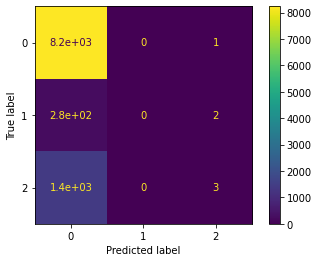

In [66]:
disp.plot();